In [1]:
#lib import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#database import
from Database.datosplanta import cp_plant
from Database.datosplanta import lugares

#sell_databases
dfv1 = pd.read_csv('Database/ventas-1-65d374724924b571259206.csv')
dfv2 = pd.read_csv('Database//ventas-2-65d374947fb4d216940241.csv')

#cost per plant
print(dfv1.head())
print(dfv2.head())

                 tipo   color talla                   planta
0              Shorts   Negro    XL     KnitNest Textile Co.
1  Pantalón Deportivo    Azul     S        DyeDreams Factory
2              Shorts  Blanco     M         TelaTech Factory
3            Leggings    Azul     M        WeaveWave Fabrics
4               Jeans    Gris     L  ThreadTide Textile Mill
                 tipo   color talla                    planta
0  Pantalón Deportivo  Blanco     L         DyeDreams Factory
1      Pantalón Cargo   Verde     L  FiberWorks Manufacturing
2               Jeans    Azul     S     LinenLoom Productions
3      Pantalón Cargo    Gris    XL         DyeDreams Factory
4  Pantalón Deportivo   Negro     S          TelaTech Factory


In [3]:
#Convert dictionaries into dataframes
cpdf = pd.DataFrame(cp_plant)
lugaresdf = pd.DataFrame(lugares)

print(cpdf.head())
print(lugaresdf.head())

                     planta  precio
0          TelaTech Factory    4.55
1  FiberWorks Manufacturing    4.34
2       SilkStream Textiles    4.27
3         CottonCraft Works    4.13
4     LinenLoom Productions    4.90
                          lugar  descuento  envio
0              EcoChic Boutique         30      3
1        Vintage Vogue Emporium         35      4
2          FitFrenzy Activewear         33      3
3  Little Sprouts Fashion House         30      3
4      Local Threads Collective         40      5


In [4]:
#There is no null values
dfv1.isnull()
dfv2.isnull()

,tipo,color,talla,planta
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
494,False,False,False,False
495,False,False,False,False
496,False,False,False,False
497,False,False,False,False


In [5]:
#concat

dfv = pd.concat([dfv1, dfv2], ignore_index=True)

In [6]:
#Drop the columns that not will be use
droped_columns = ['tipo', 'color', 'talla']
jplantas = dfv.drop(columns=droped_columns)

print(jplantas.tail())

                      planta
993         TelaTech Factory
994        DyeDreams Factory
995  YarnYield Manufacturing
996        DyeDreams Factory
997  YarnYield Manufacturing


In [7]:
#La columna original de plantas presentadas en las 2 bases de datos 

In [8]:
#Se eliminan duplicados en planta
dfvc = jplantas.drop_duplicates(subset=['planta'])

#frecuencia de plantas
frecuencia_plantas = dfv['planta'].value_counts().reset_index()
frecuencia_plantas.columns = ['planta', 'frecuencia']
print(frecuencia_plantas)


                     planta  frecuencia
0   YarnYield Manufacturing         114
1  FiberWorks Manufacturing         110
2     LinenLoom Productions         106
3         CottonCraft Works         103
4       SilkStream Textiles         102
5   ThreadTide Textile Mill         101
6          TelaTech Factory          97
7         DyeDreams Factory          89
8         WeaveWave Fabrics          89
9      KnitNest Textile Co.          87


In [9]:

#Dataframe con frecuencias

df_cf = dfvc.merge(frecuencia_plantas, on='planta', how='inner')
print(df_cf.tail())

                     planta  frecuencia
5     LinenLoom Productions         106
6       SilkStream Textiles         102
7         CottonCraft Works         103
8  FiberWorks Manufacturing         110
9   YarnYield Manufacturing         114


In [10]:
df_cf = df_cf.merge(cpdf, on='planta', how='inner')
print(df_cf.head())

                    planta  frecuencia  precio
0     KnitNest Textile Co.          87    4.67
1        DyeDreams Factory          89    4.51
2         TelaTech Factory          97    4.55
3        WeaveWave Fabrics          89    4.72
4  ThreadTide Textile Mill         101    4.34


In [11]:
df_cf['pre_costo'] = df_cf['frecuencia'] * df_cf['precio']
df_cf = df_cf.sort_values(by='precio', ascending=False)
print(df_cf)


                     planta  frecuencia  precio  pre_costo
5     LinenLoom Productions         106    4.90     519.40
3         WeaveWave Fabrics          89    4.72     420.08
0      KnitNest Textile Co.          87    4.67     406.29
2          TelaTech Factory          97    4.55     441.35
1         DyeDreams Factory          89    4.51     401.39
4   ThreadTide Textile Mill         101    4.34     438.34
8  FiberWorks Manufacturing         110    4.34     477.40
9   YarnYield Manufacturing         114    4.30     490.20
6       SilkStream Textiles         102    4.27     435.54
7         CottonCraft Works         103    4.13     425.39


In [12]:
resultados = []

for _, planta_row in df_cf.iterrows():
    # Iterar sobre cada fila de lugares_df
    for _, lugar_row in lugaresdf.iterrows():
        # Calcular descuento aplicado
        descuento_aplicado = planta_row['pre_costo'] * (lugar_row['descuento'] / 100)
        # Calcular costo final
        costo_final = planta_row['pre_costo'] - descuento_aplicado + lugar_row['envio']
        # Agregar los resultados a la lista
        resultados.append({
            'planta': planta_row['planta'],
            'lugar': lugar_row['lugar'],
            'descuento_aplicado': descuento_aplicado,
            'costo_final': costo_final
        })

# Crear un DataFrame a partir de la lista de resultados
resultados_df = pd.DataFrame(resultados)

In [13]:
#Se organizan los resultados en un dataframe con todos los datos importantes
resultados_df = pd.DataFrame(resultados)
resultados_df = pd.merge(resultados_df, df_cf[['planta', 'frecuencia']], on='planta', how='left')
resultados_df = resultados_df[['planta', 'frecuencia', 'lugar', 'descuento_aplicado', 'costo_final']]
print(resultados_df)

                      planta  frecuencia                         lugar  \
0      LinenLoom Productions         106              EcoChic Boutique   
1      LinenLoom Productions         106        Vintage Vogue Emporium   
2      LinenLoom Productions         106          FitFrenzy Activewear   
3      LinenLoom Productions         106  Little Sprouts Fashion House   
4      LinenLoom Productions         106      Local Threads Collective   
5          WeaveWave Fabrics          89              EcoChic Boutique   
6          WeaveWave Fabrics          89        Vintage Vogue Emporium   
7          WeaveWave Fabrics          89          FitFrenzy Activewear   
8          WeaveWave Fabrics          89  Little Sprouts Fashion House   
9          WeaveWave Fabrics          89      Local Threads Collective   
10      KnitNest Textile Co.          87              EcoChic Boutique   
11      KnitNest Textile Co.          87        Vintage Vogue Emporium   
12      KnitNest Textile Co.          

C:\Users\camil\AppData\Local\Temp\ipykernel_1196\1468240368.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


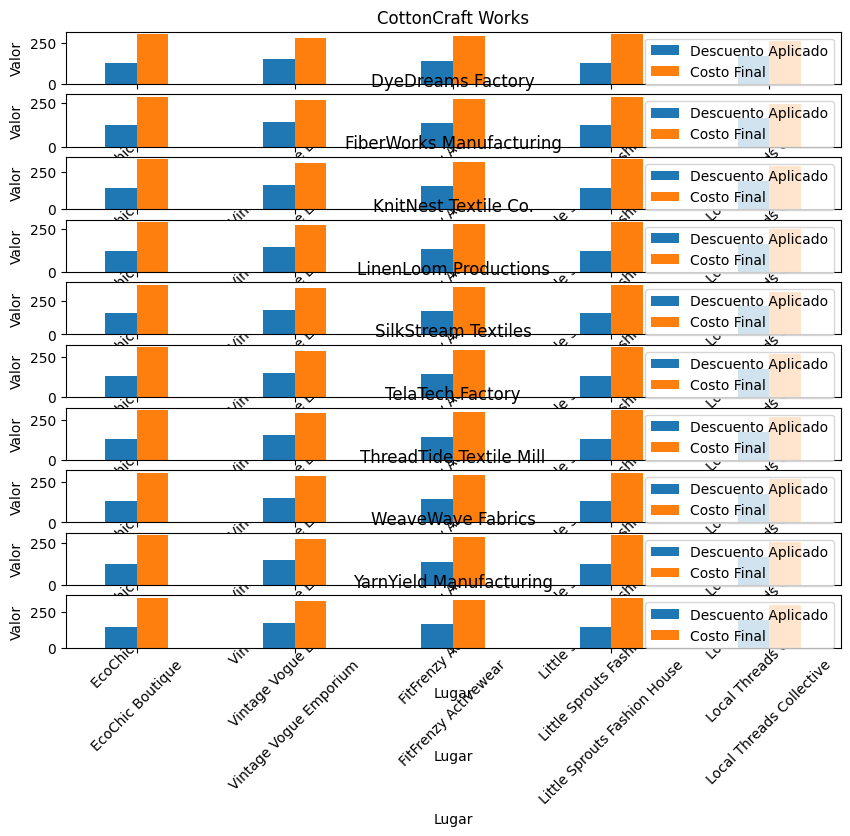

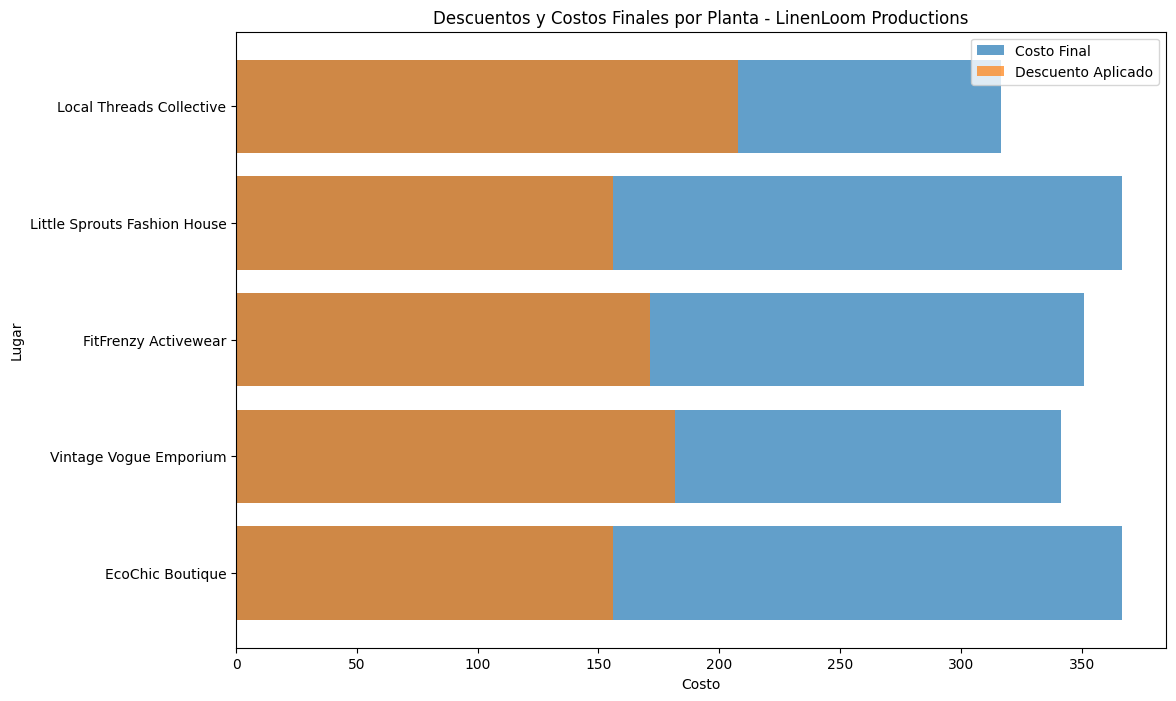

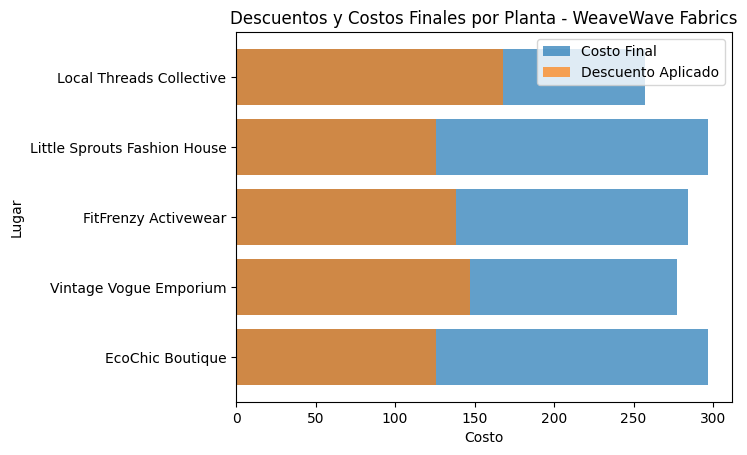

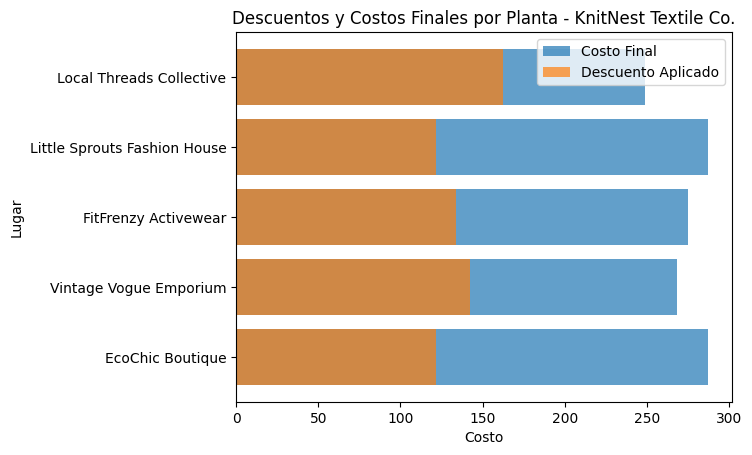

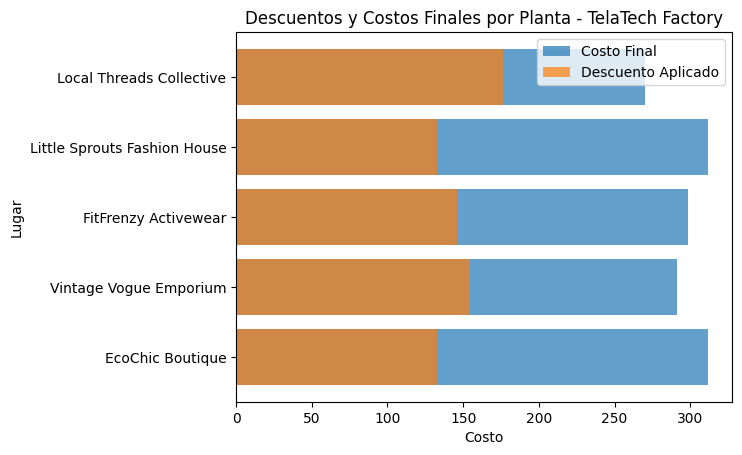

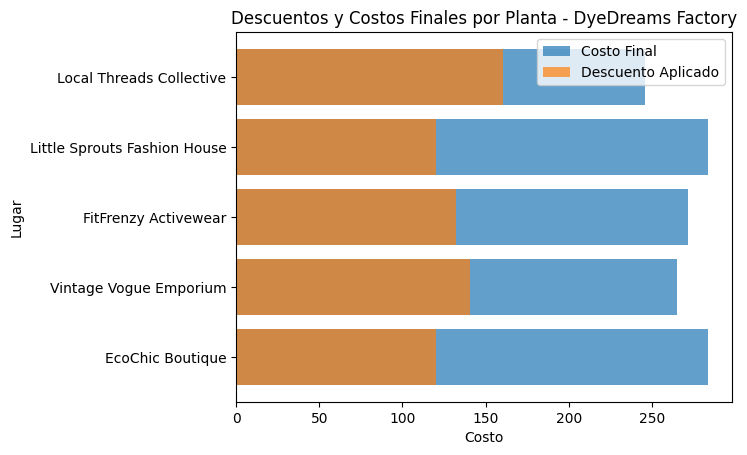

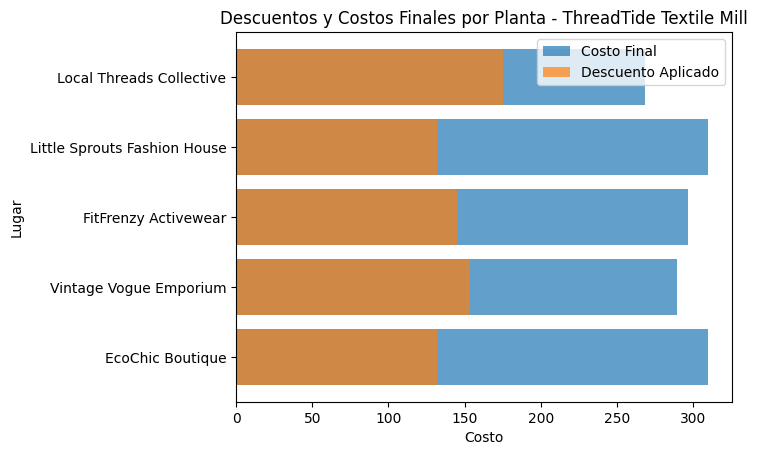

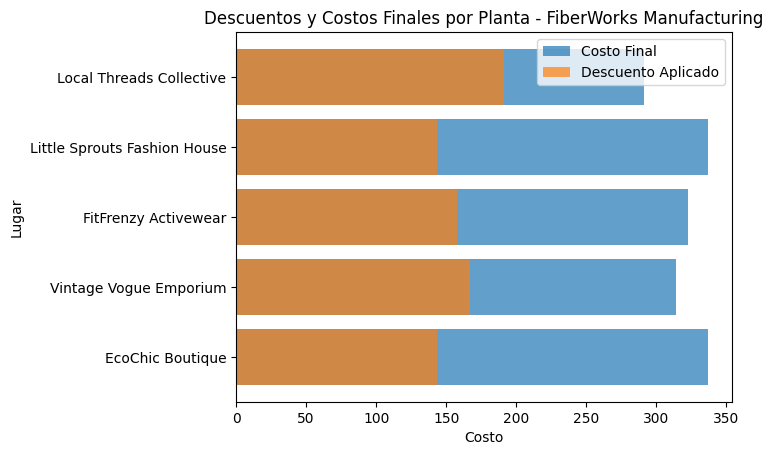

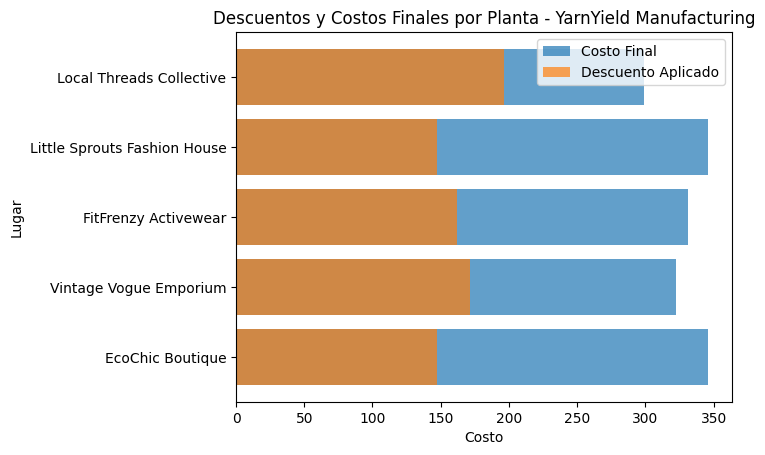

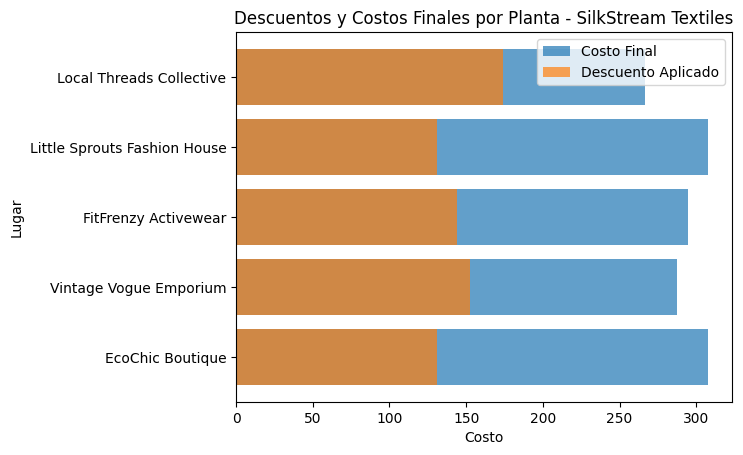

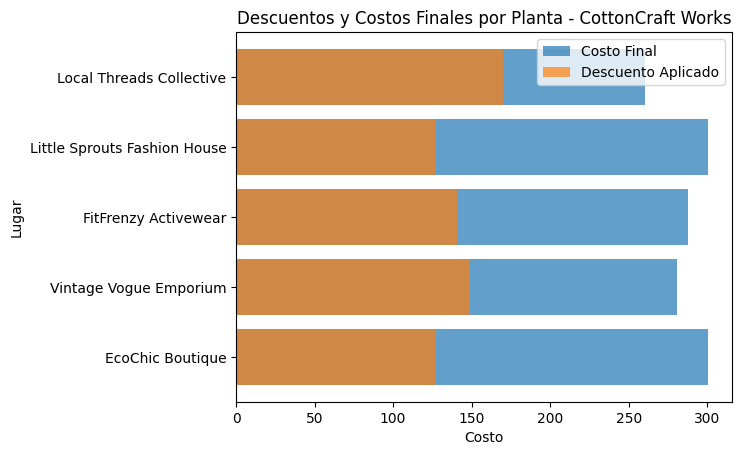

In [19]:
fig, axes = plt.subplots(nrows=len(resultados_df['planta'].unique()), ncols=1, figsize=(10, 8))

for i, (planta, data) in enumerate(resultados_df.groupby('planta')):
    ax = axes[i]
    data.plot(kind='bar', x='lugar', y=['descuento_aplicado', 'costo_final'], ax=ax, rot=45, width=0.4)
    ax.set_title(planta)
    ax.set_ylabel('Valor')
    ax.set_xlabel('Lugar')
    ax.legend(['Descuento Aplicado', 'Costo Final'])

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

for planta in df_cf['planta']:
    planta_data = resultados_df[resultados_df['planta'] == planta]
    lugares = planta_data['lugar']
    costos_finales = planta_data['costo_final']
    descuentos = planta_data['descuento_aplicado']

    plt.barh(lugares, costos_finales, label='Costo Final', alpha=0.7)
    plt.barh(lugares, descuentos, label='Descuento Aplicado', alpha=0.7)

    plt.xlabel('Costo')
    plt.ylabel('Lugar')
    plt.title(f'Descuentos y Costos Finales por Planta - {planta}')
    plt.legend()

  #Mostrar la gráfica para cada planta
    plt.show()

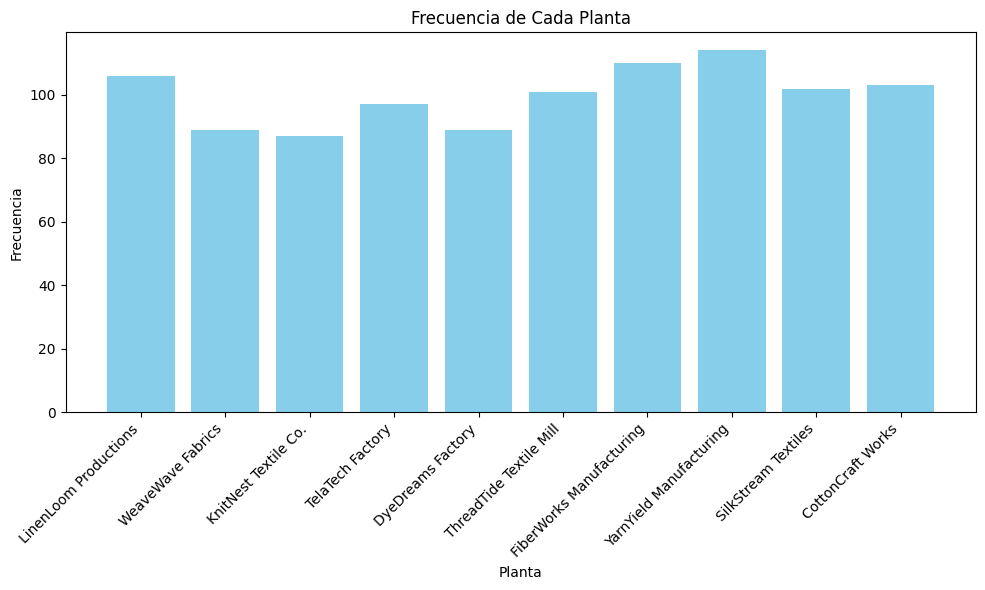

In [18]:
#gráfico de frecuencias por planta
# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las frecuencias de cada planta
ax.bar(df_cf['planta'], df_cf['frecuencia'], color='skyblue')

# Añadir etiquetas de ejes y título
ax.set_xlabel('Planta')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de Cada Planta')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()